# Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score



# Загрузка данных

In [3]:

data1 = pd.read_excel('/Users/vera/Desktop/Data_Science/ДИПЛОМ/data/X_bp.xlsx')
data2 = pd.read_excel('/Users/vera/Desktop/Data_Science/ДИПЛОМ/data/X_nup.xlsx')

merged_data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

# Разведочный анализ данных

In [37]:
merged_data.head()

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4,0,5.0,57.0


In [4]:
data = merged_data.drop(columns='Unnamed: 0_x')
data = data.drop(columns='Unnamed: 0_y')



In [39]:
data.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [40]:
data.size

13299

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [42]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


# Предобработка данных

In [5]:
# Разделение на признаки и целевые переменные
X = data.drop(columns=['Соотношение матрица-наполнитель'])
y = data[['Соотношение матрица-наполнитель']]


In [44]:
# Вывод максимальных и минимальных значений до нормализации
print("До нормализации:")
print("Максимальные значения:")
print(X.max())
print("Минимальные значения:")
print(X.min())

До нормализации:
Максимальные значения:
Плотность, кг/м3                        2207.773481
модуль упругости, ГПа                   1911.536477
Количество отвердителя, м.%              198.953207
Содержание эпоксидных групп,%_2           33.000000
Температура вспышки, С_2                 413.273418
Поверхностная плотность, г/м2           1399.542362
Модуль упругости при растяжении, ГПа      82.682051
Прочность при растяжении, МПа           3848.436732
Потребление смолы, г/м2                  414.590628
Угол нашивки, град                        90.000000
Шаг нашивки                               14.440522
Плотность нашивки                        103.988901
dtype: float64
Минимальные значения:
Плотность, кг/м3                        1731.764635
модуль упругости, ГПа                      2.436909
Количество отвердителя, м.%               17.740275
Содержание эпоксидных групп,%_2           14.254985
Температура вспышки, С_2                 100.000000
Поверхностная плотность, г/м2          

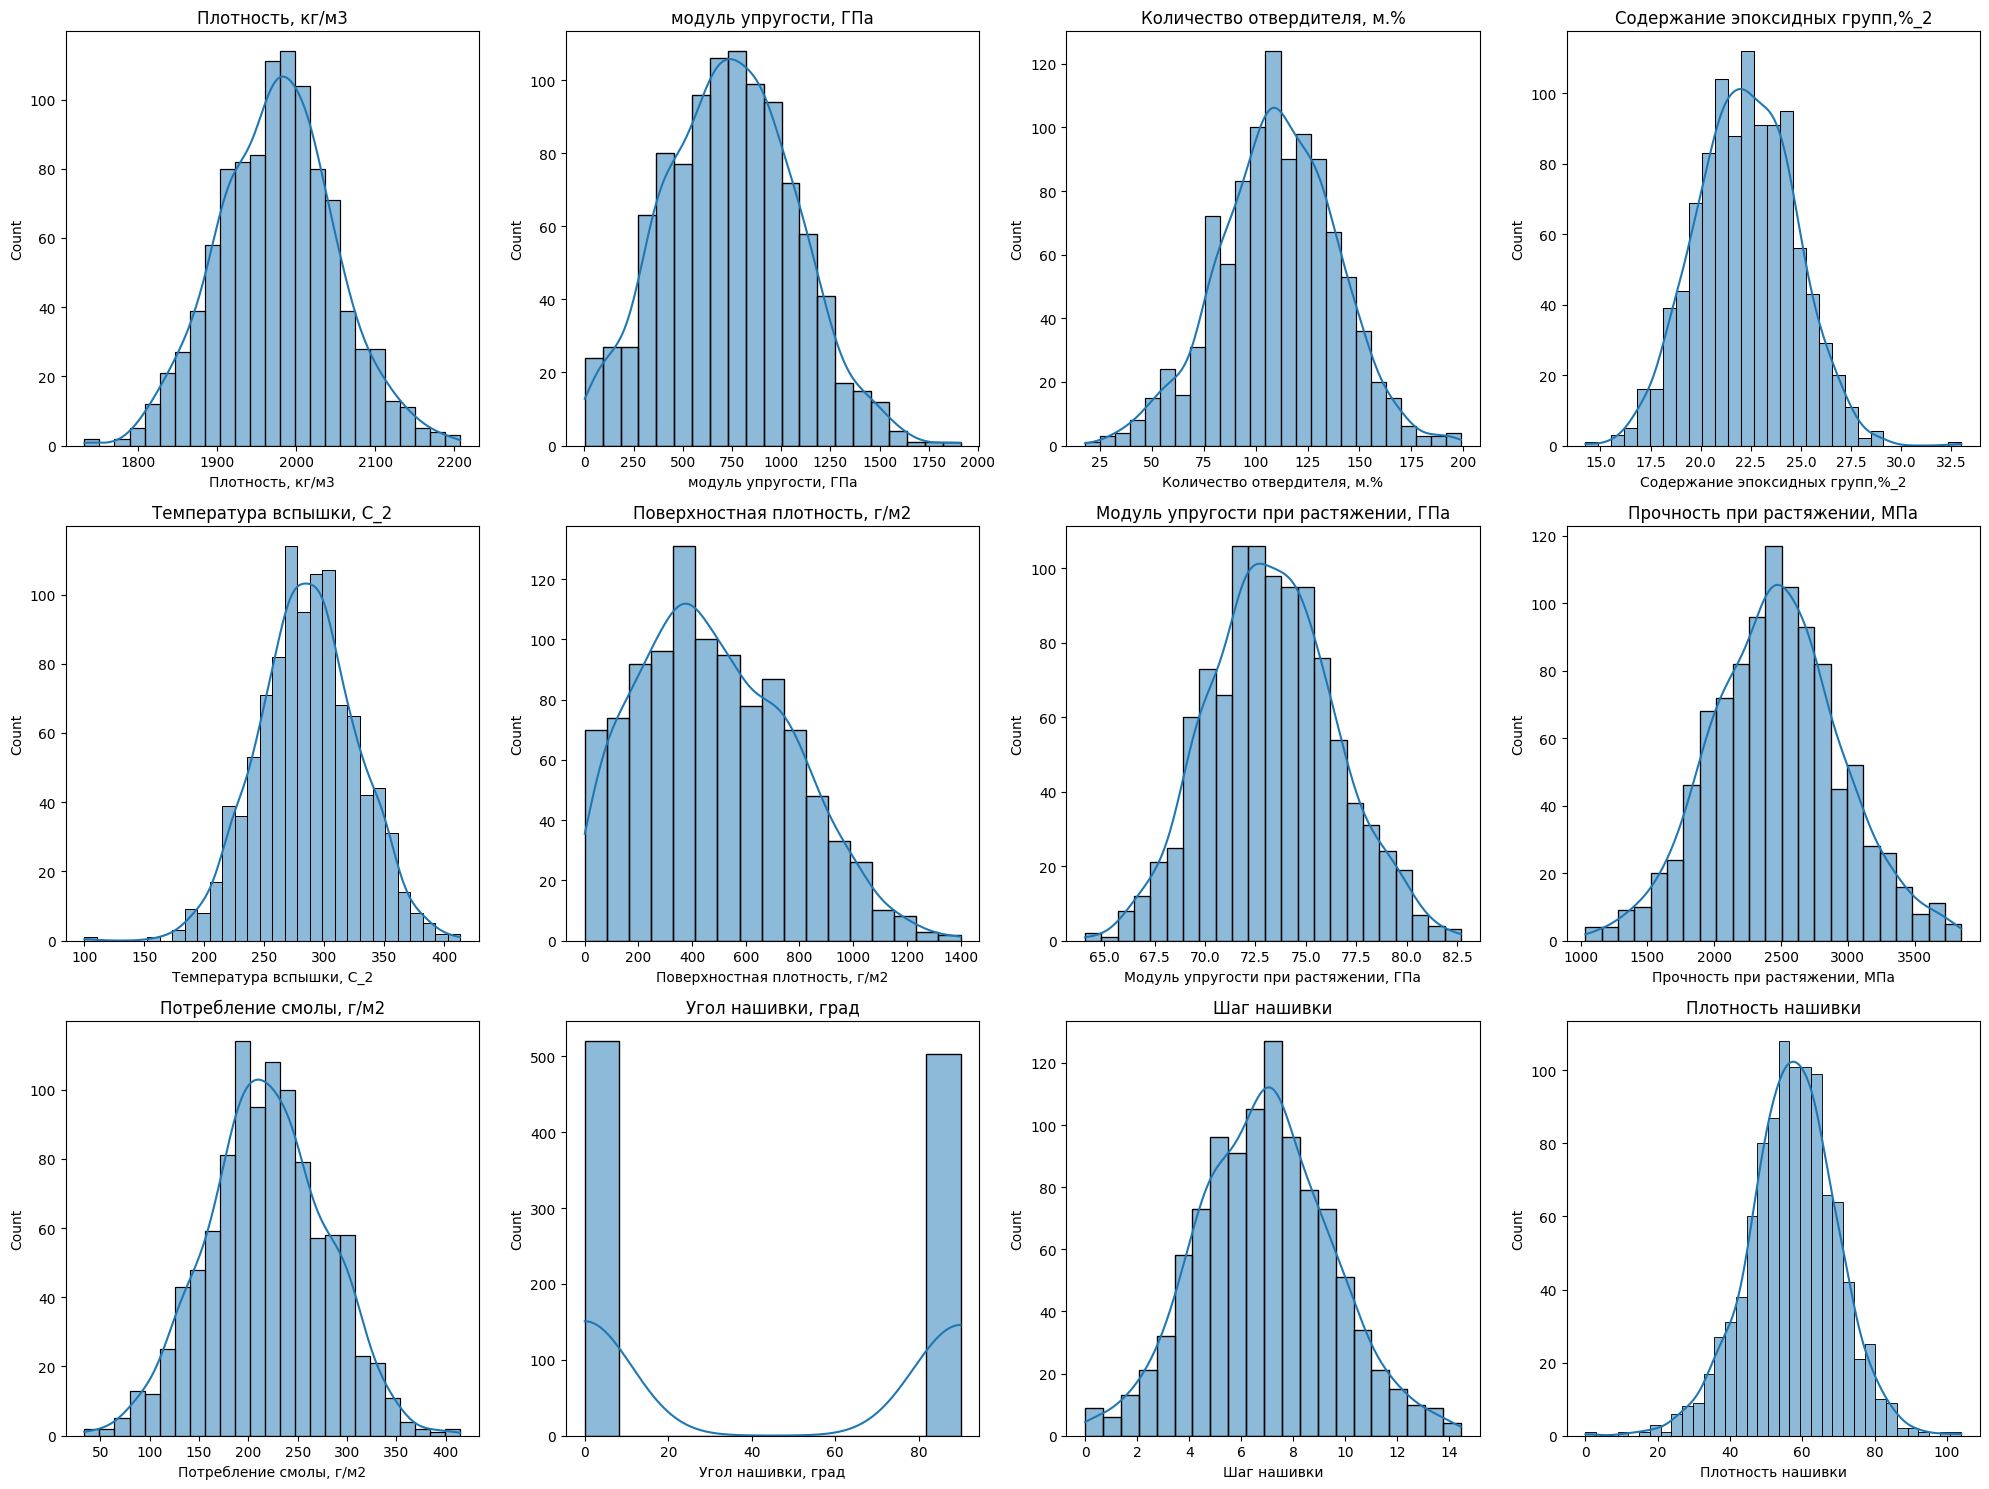

In [14]:
# Графики распределения до нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

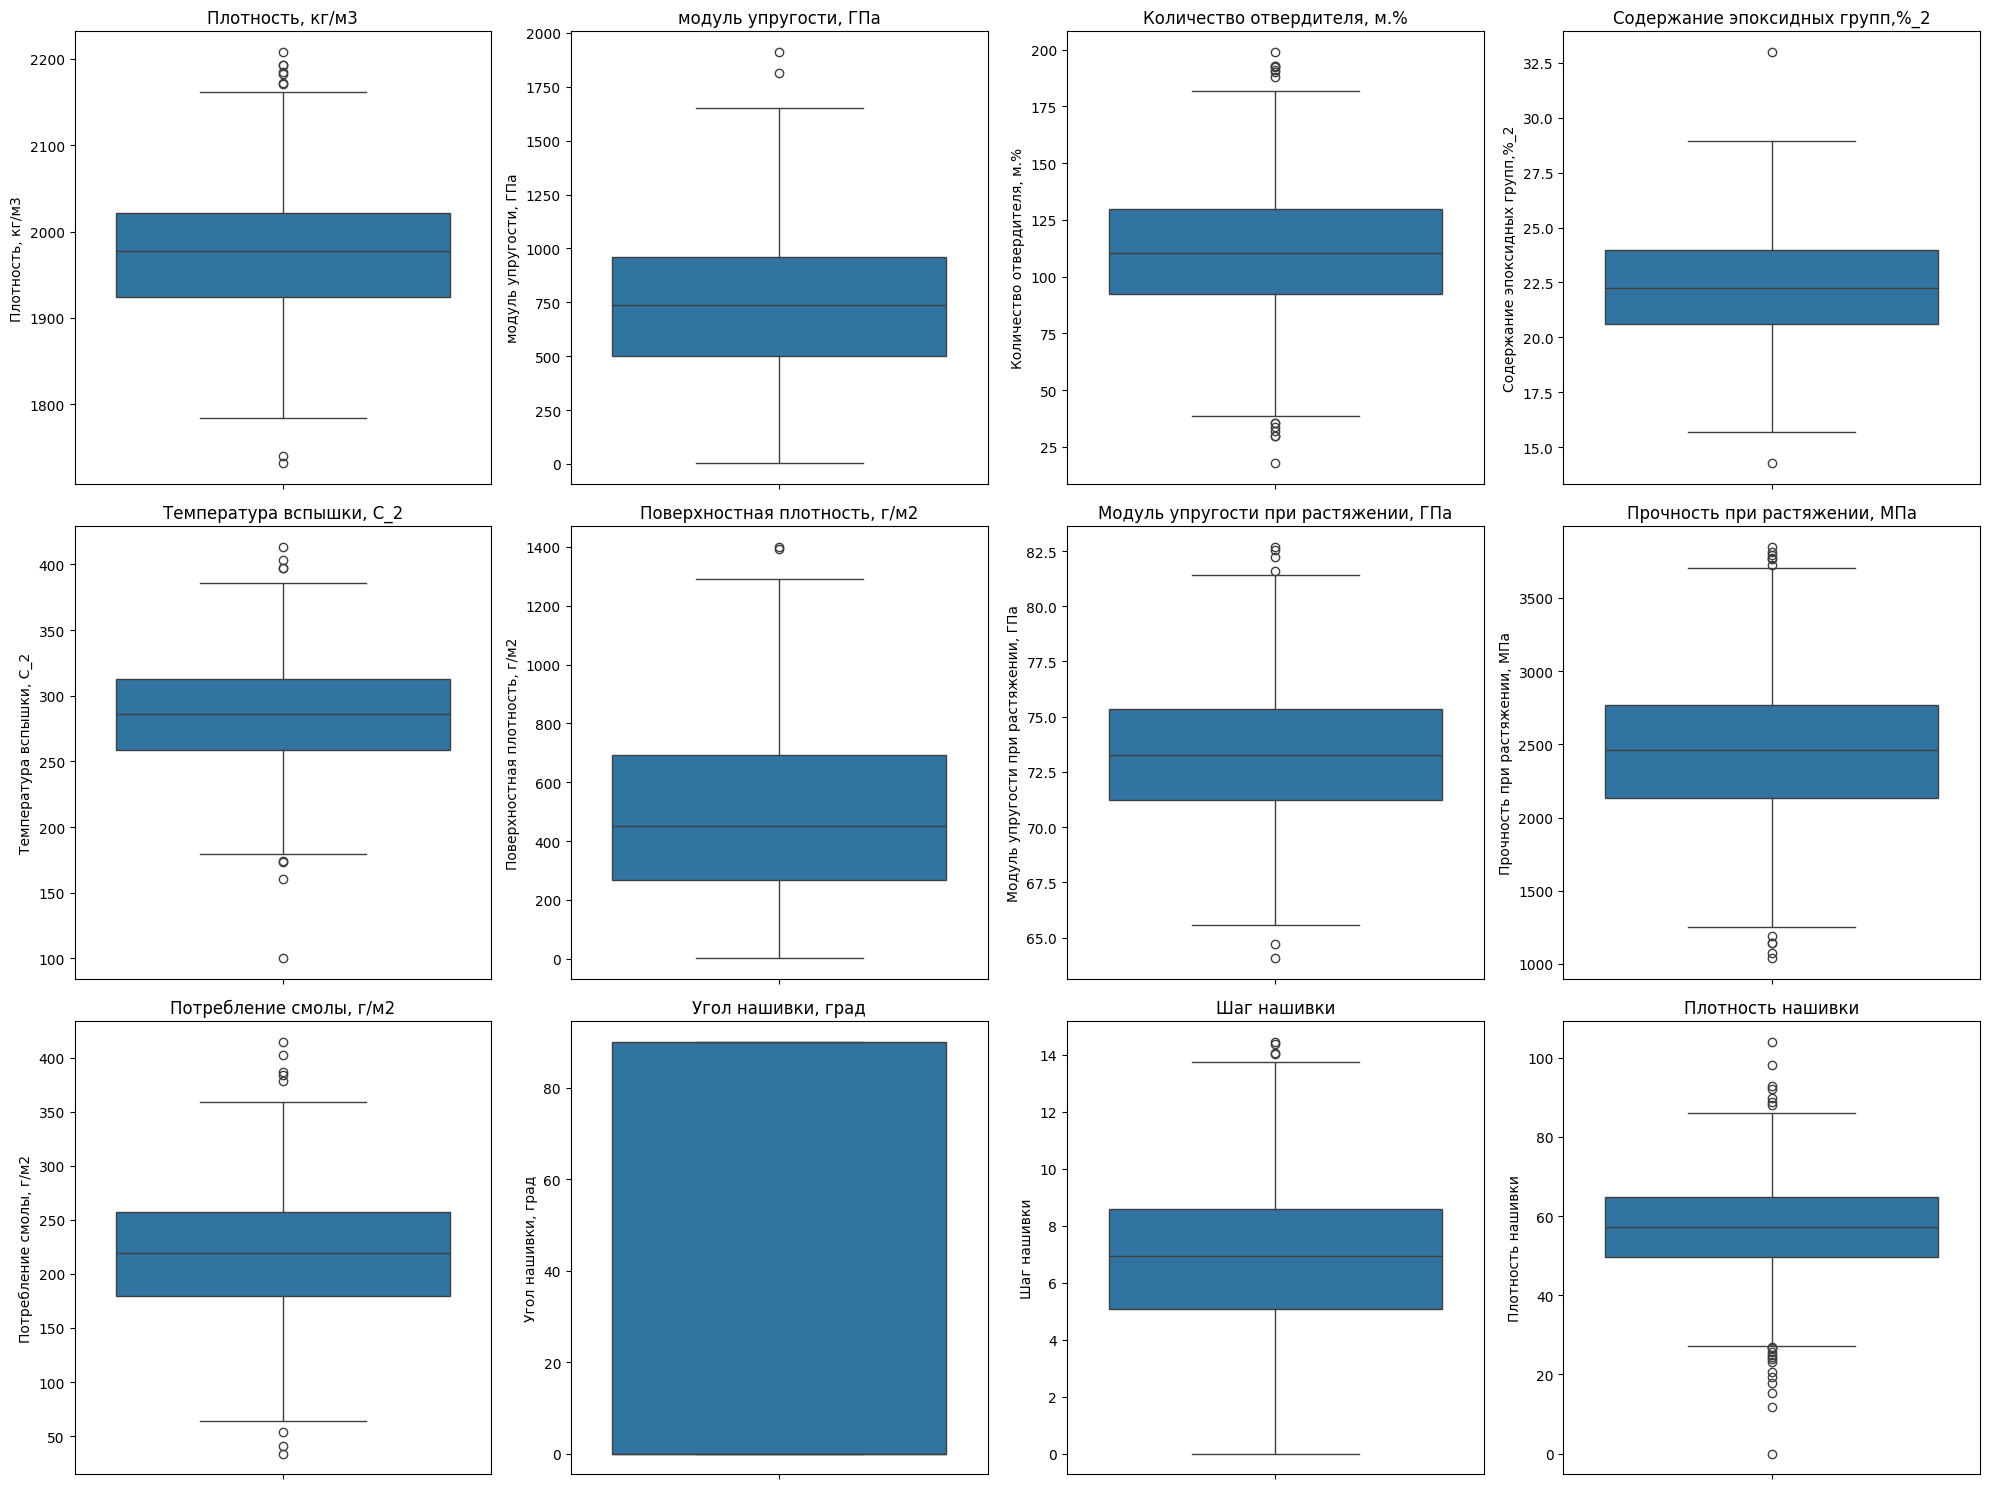

In [15]:
# Диаграммы "усов и ящиков" до нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=X[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [16]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
# Вывод максимальных и минимальных значений после нормализации
print("После нормализации:")
print("Максимальные значения:")
print(X_scaled_df.max())
print("Минимальные значения:")
print(X_scaled_df.min())

После нормализации:
Максимальные значения:
Плотность, кг/м3                        3.148712
модуль упругости, ГПа                   3.549589
Количество отвердителя, м.%             3.125033
Содержание эпоксидных групп,%_2         4.471955
Температура вспышки, С_2                3.112932
Поверхностная плотность, г/м2           3.260615
Модуль упругости при растяжении, ГПа    3.000355
Прочность при растяжении, МПа           2.846190
Потребление смолы, г/м2                 3.285517
Угол нашивки, град                      1.016758
Шаг нашивки                             2.943275
Плотность нашивки                       3.793863
dtype: float64
Минимальные значения:
Плотность, кг/м3                       -3.310622
модуль упругости, ГПа                  -2.234332
Количество отвердителя, м.%            -3.282308
Содержание эпоксидных групп,%_2        -3.321825
Температура вспышки, С_2               -4.542215
Поверхностная плотность, г/м2          -1.714677
Модуль упругости при растяжении, ГПа  

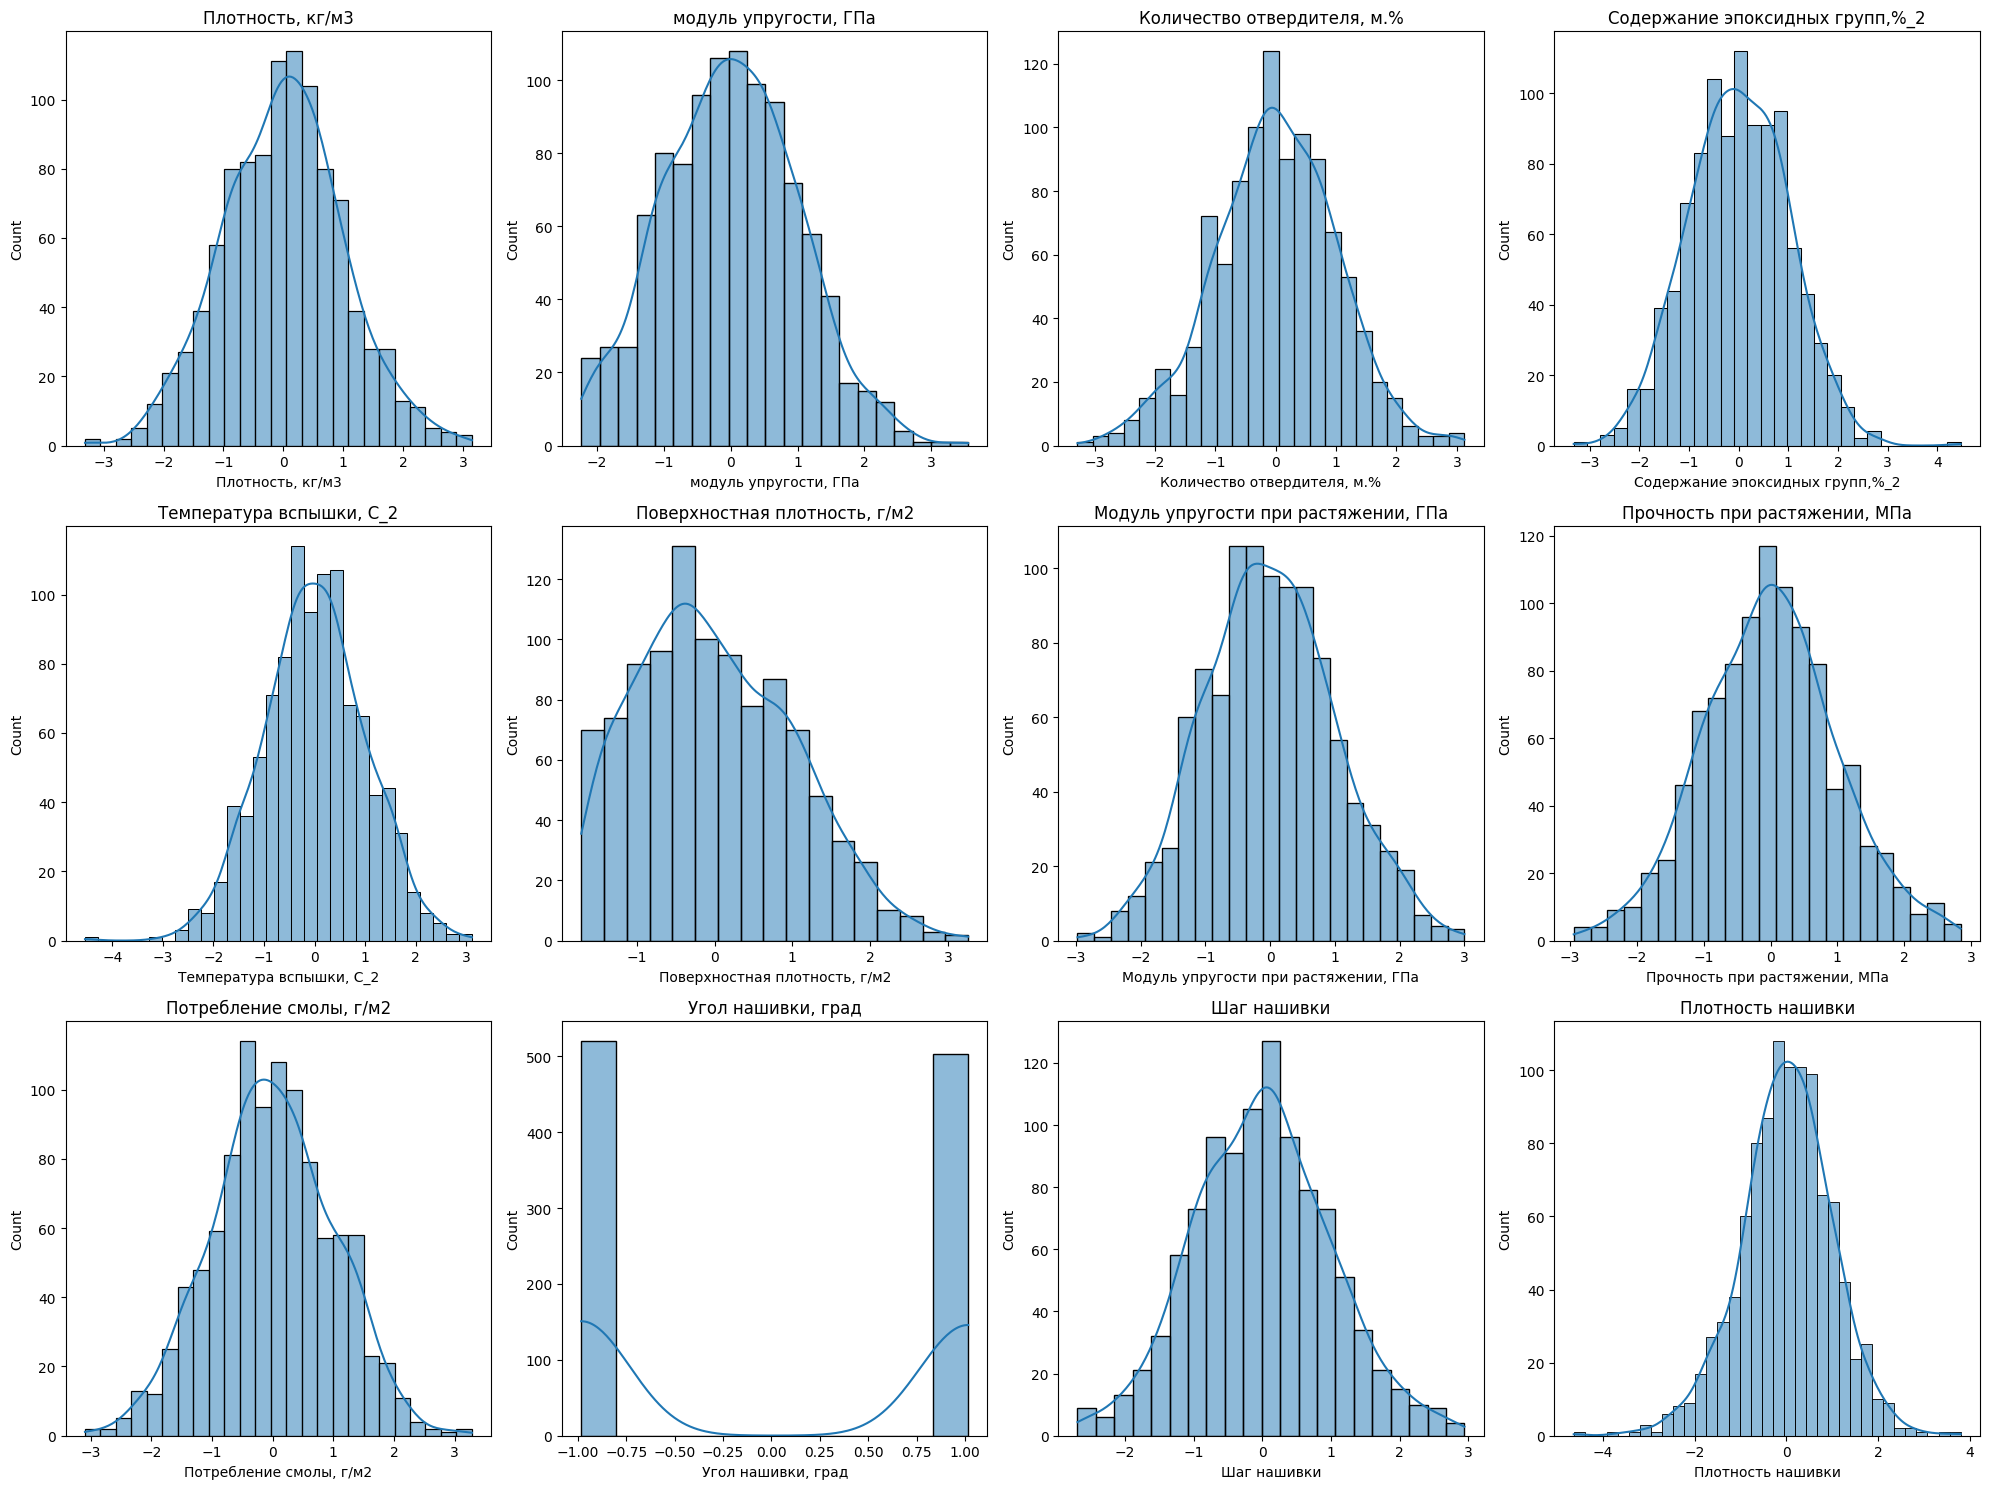

In [18]:
# Графики распределения после нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_scaled_df[column], kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

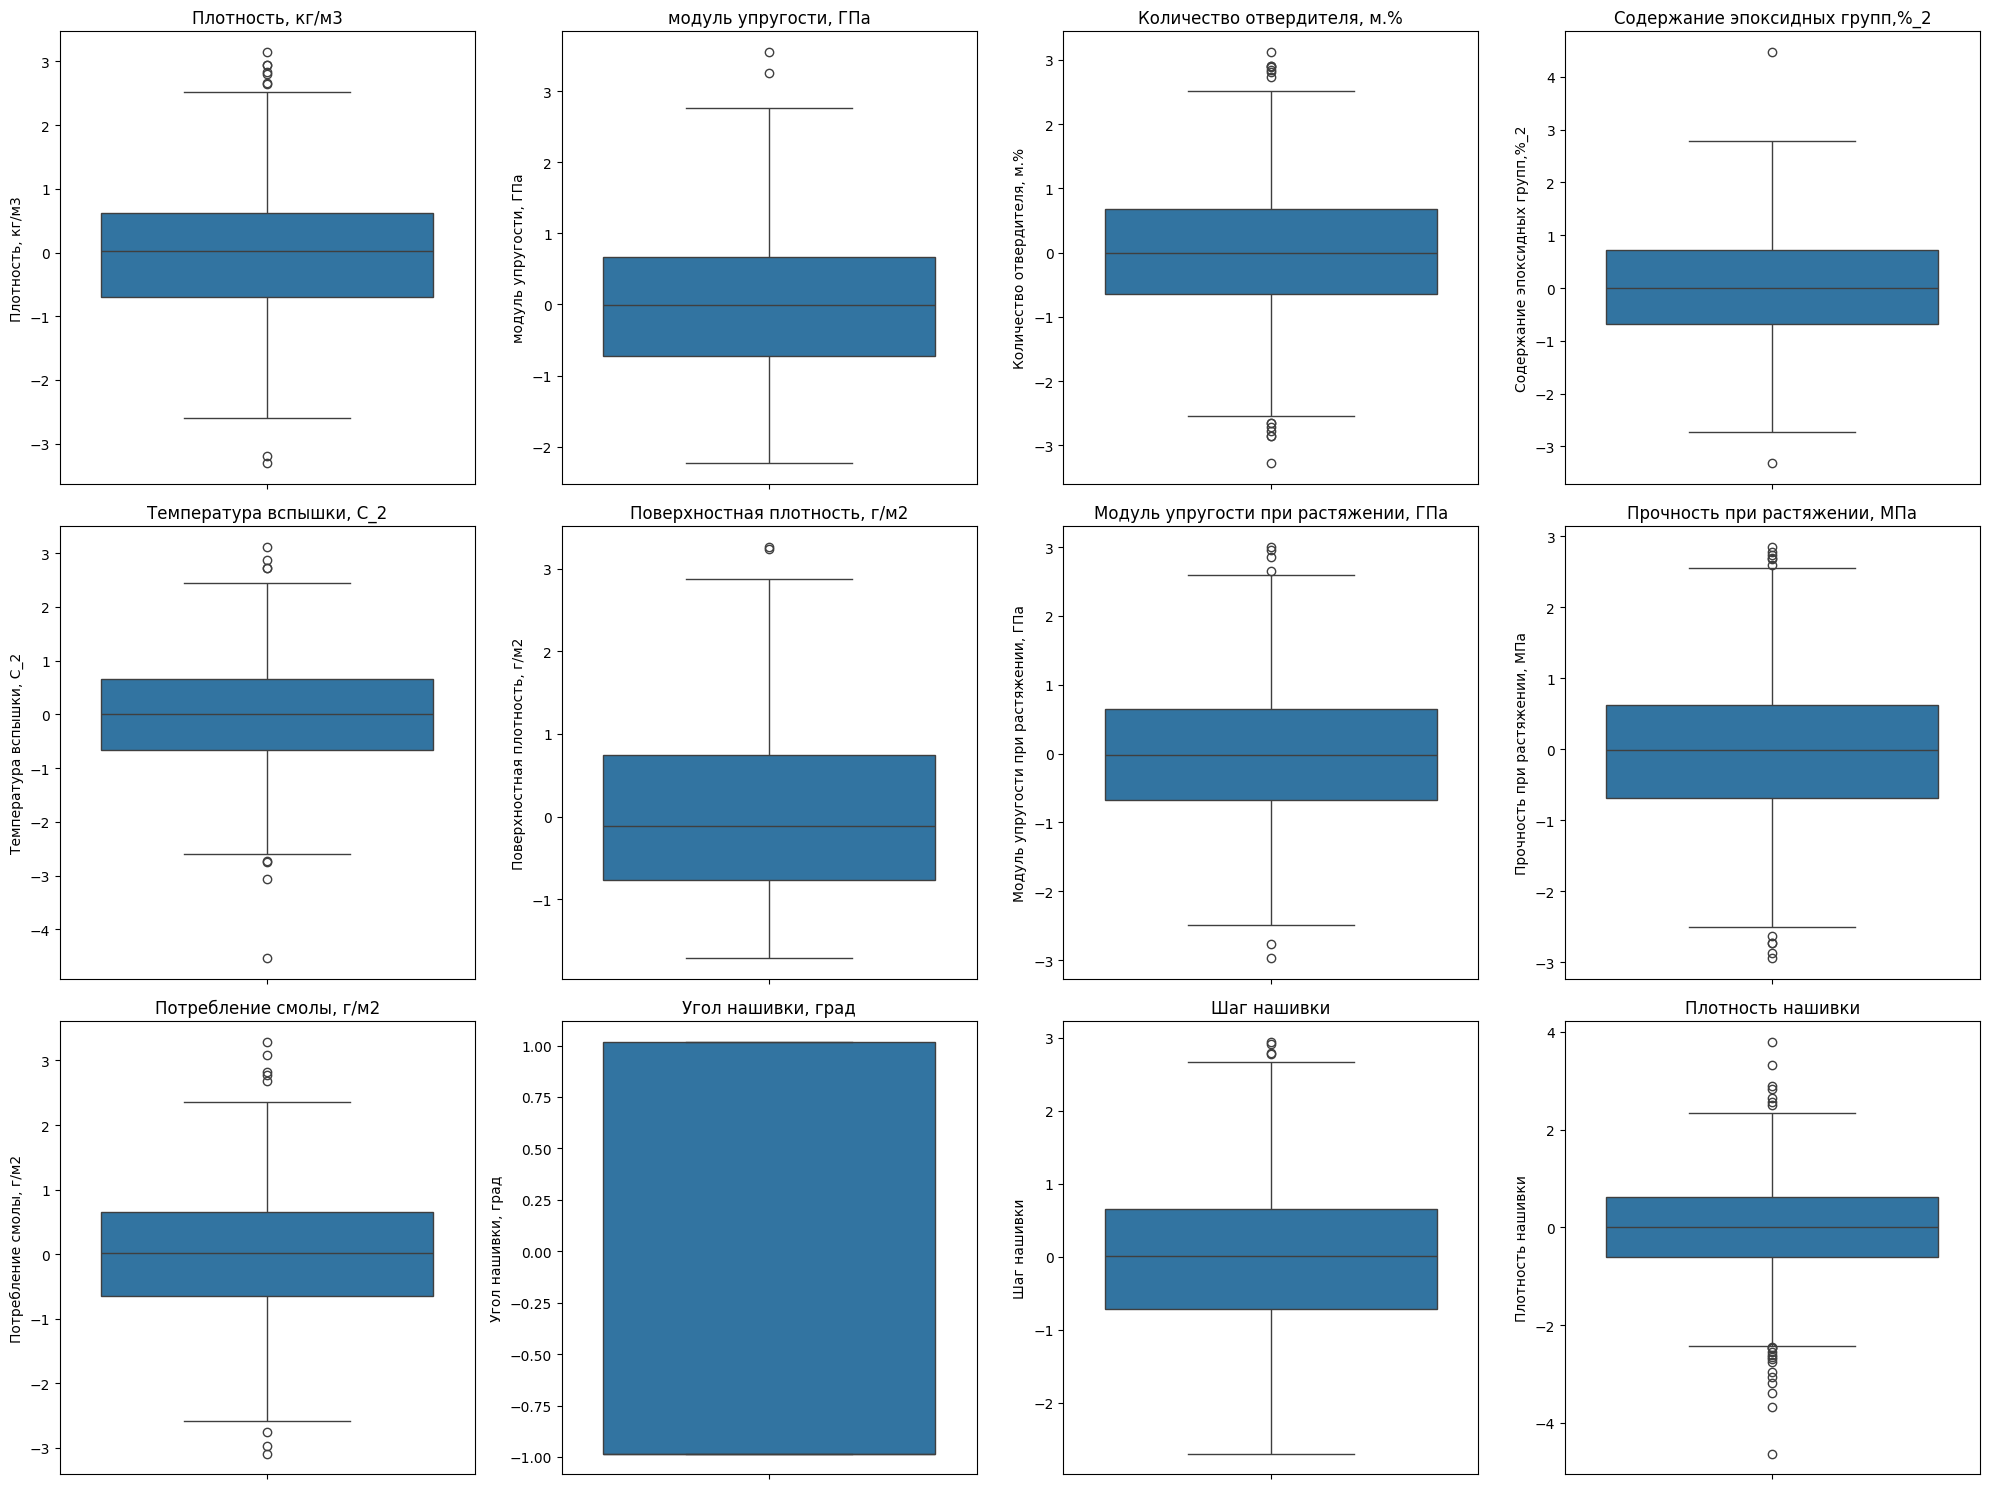

In [19]:
# Диаграммы "усов и ящиков" после нормализации
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=X_scaled_df[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [20]:
# Анализ корреляции
correlation_matrix = data.corr()

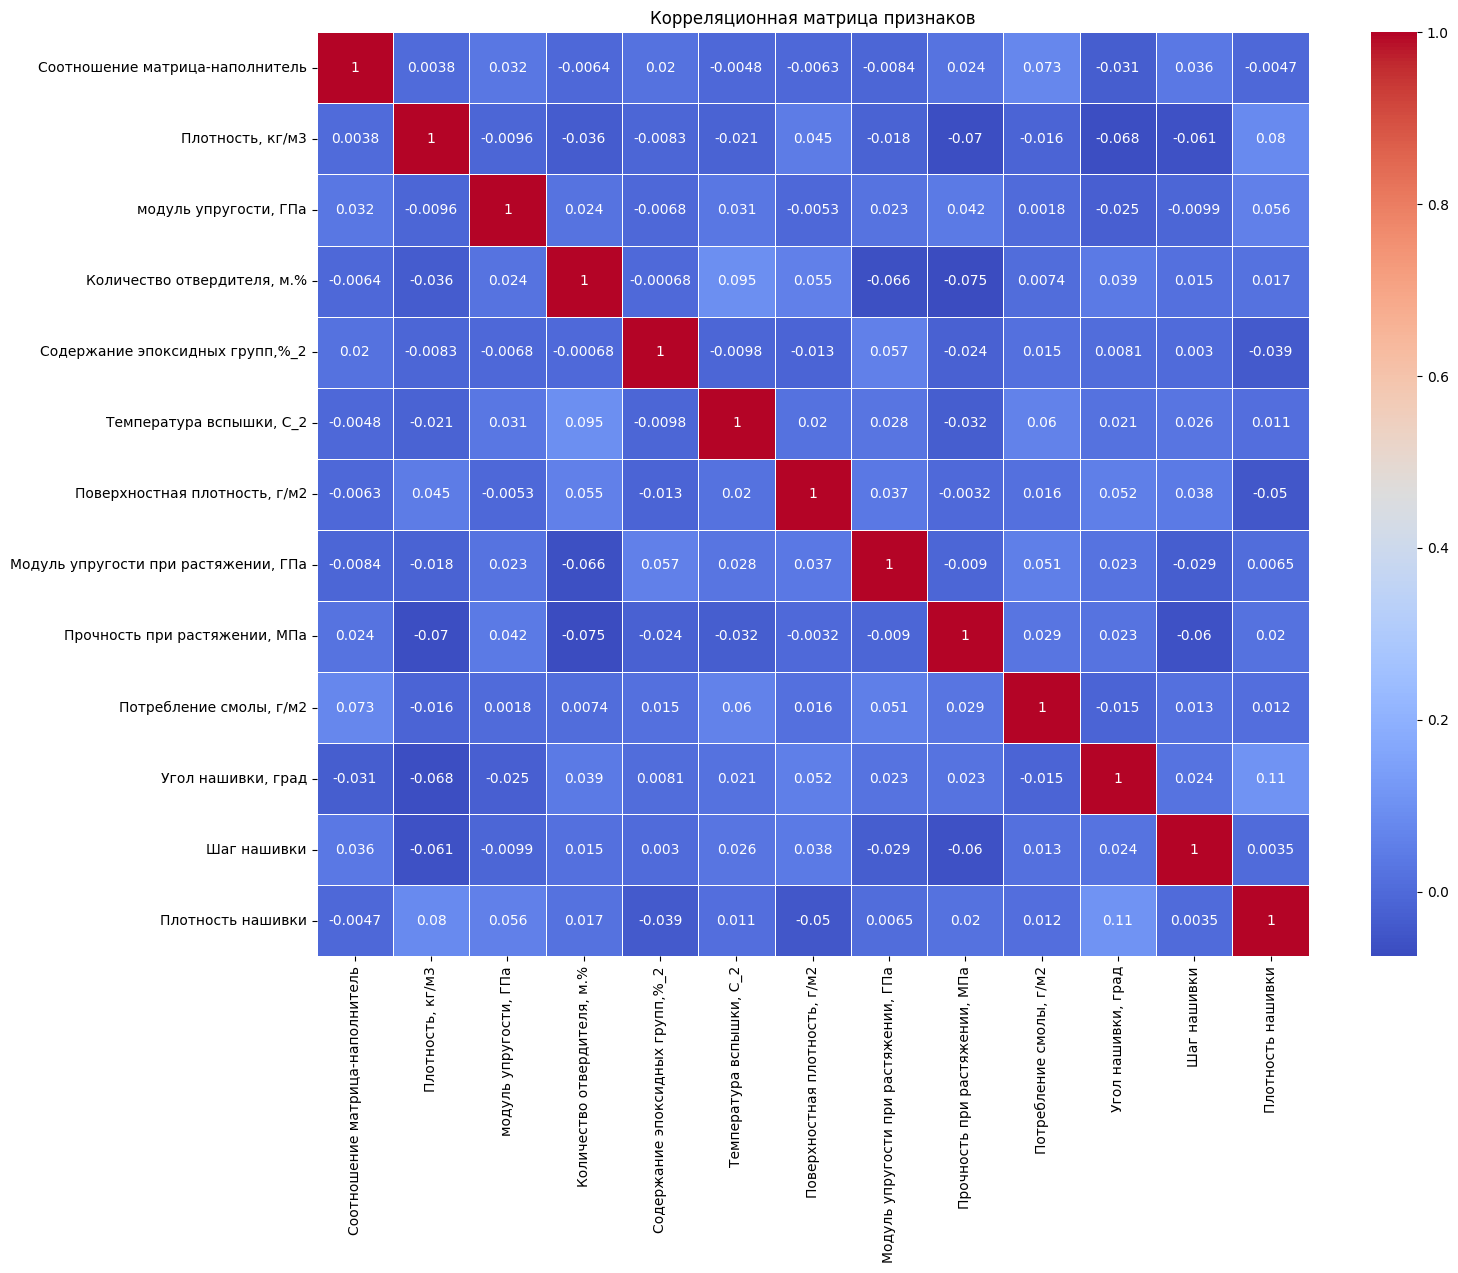

In [22]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

# Разработка и обучение модели

In [6]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
y_train

,Соотношение матрица-наполнитель
137,3.324535
377,2.403275
388,3.666993
824,2.892482
767,2.548177
...,...
106,2.334566
270,2.192099
860,2.649748
435,4.200930


In [48]:
y_test

,Соотношение матрица-наполнитель
525,3.790051
357,2.661267
444,3.174404
31,1.771436
618,3.276517
...,...
542,1.509893
903,3.052355
528,3.482206
294,4.033175


In [9]:
# Построение модели нейронной сети
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Два выхода для предсказания двух целевых значений
])


/Users/vera/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9103 - val_loss: 1.6074
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4801 - val_loss: 1.1754
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2029 - val_loss: 1.1440
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9778 - val_loss: 1.0930
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0213 - val_loss: 1.1310
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0139 - val_loss: 1.0892
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9261 - val_loss: 1.0778
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8569 - val_loss: 1.1955
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8756 - val_loss: 1.0614
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8338 - val_loss: 1.0673
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7703 - val_loss: 1.0436
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8

#  Тестирование модели

In [12]:
# Оценка модели на тестовой выборке
y_test_pred = model.predict(X_test)
y_test_pred



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[2.9893947],
       [2.9149349],
       [2.918998 ],
       [3.0583913],
       [1.1254011],
       [3.4990594],
       [2.9882715],
       [2.7011678],
       [3.277405 ],
       [3.6946309],
       [3.0490072],
       [1.6949154],
       [3.4359448],
       [3.4561002],
       [4.6100025],
       [1.8038701],
       [2.5449777],
       [3.491045 ],
       [4.7717   ],
       [3.4066846],
       [1.9680331],
       [2.963515 ],
       [3.429693 ],
       [4.058408 ],
       [1.973246 ],
       [2.7580311],
       [3.271353 ],
       [3.7509158],
       [3.4186404],
       [2.8299801],
       [3.0295122],
       [3.2421246],
       [4.521211 ],
       [2.187908 ],
       [3.151661 ],
       [2.4009438],
       [2.4315789],
       [2.1056612],
       [1.3940773],
       [2.4423985],
       [3.2536206],
       [2.7686093],
       [3.169037 ],
       [2.1263835],
       [2.5303593],
       [2.0102806],
       [0.5071556],
       [2.260386 ],
       [2.7179532],
       [1.736702 ],


In [13]:
loss = model.evaluate(X_test, y_test)
print(f'MSE: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 1.4581
MSE: 1.6703760623931885


In [14]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


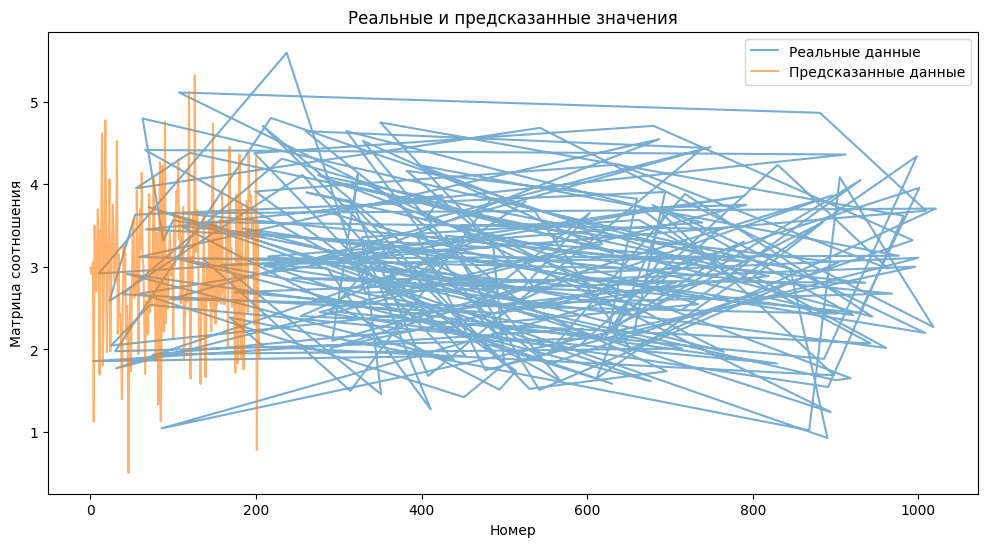

In [15]:
#График наложения предсказанных и реальных данных на тестовой выборке
plt.figure(figsize=(12, 6))


plt.plot(y_test, label='Реальные данные', alpha = 0.6)
plt.plot(y_pred, label='Предсказанные данные', alpha = 0.6)

plt.xlabel('Номер')
plt.ylabel('Матрица соотношения')
plt.title('Реальные и предсказанные значения')
plt.legend()

plt.show()


In [16]:
#Рекомендации по соотношению матрица-наполнитель
def recommend_ratio(X_new, scaler, model):
    # Нормализация новых данных
    X_new_scaled = scaler.transform(X_new)
    # Предсказание значений
    predictions = model.predict(X_new_scaled)
    return predictions


In [19]:
# Пример новых данных для рекомендаций
X_new = np.array([[2050, 750, 7368421, 30, 25, 26785714, 200, 100, 3000, 220, 0, 4]])  # Пример новых признаков

In [20]:
predictions = recommend_ratio(X_new, scaler, model)
print('Рекомендованные значения для новых данных:', predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Рекомендованные значения для новых данных: [[74734.516]]


/Users/vera/miniconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Сохранение модели

In [65]:
# Сохранение модели
model.save('composite_model.h5')

In [66]:
# Сохранение нормализатора
import joblib
scaler = StandardScaler().fit(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']